## CAPE



In [4]:
import pandas as pd
inflation = pd.read_csv('CPIAUCNS.csv')

print (inflation.head())
# create index multiplier
inflation['CPI_Multiplier'] = inflation['CPIAUCNS'].iloc[-1] / inflation['CPIAUCNS']

print (inflation.head())


         DATE  CPIAUCNS
0  1913-01-01       9.8
1  1913-02-01       9.8
2  1913-03-01       9.8
3  1913-04-01       9.8
4  1913-05-01       9.7
         DATE  CPIAUCNS  CPI_Multiplier
0  1913-01-01       9.8        26.57898
1  1913-02-01       9.8        26.57898
2  1913-03-01       9.8        26.57898
3  1913-04-01       9.8        26.57898
4  1913-05-01       9.7        26.85299


In [7]:
df = pd.read_csv('ATNHPIUS33460Q.csv')
df = pd.merge(df, inflation, how='left', on='DATE')
#df['day'] = 1
#new_df = df[['year', 'month', 'day']]
#df['Date'] = pd.to_datetime(new_df)
print (df.head())

         DATE  ATNHPIUS33460Q  CPIAUCNS  CPI_Multiplier
0  1976-04-01           37.43      56.1        4.643030
1  1976-07-01           37.62      57.1        4.561716
2  1976-10-01           38.48      57.9        4.498687
3  1977-01-01           39.52      58.5        4.452547
4  1977-04-01           40.65      60.0        4.341233


In [8]:
df['CPIAdjPrice'] = df['ATNHPIUS33460Q'] * df['CPI_Multiplier'] 

print (df.head())

         DATE  ATNHPIUS33460Q  CPIAUCNS  CPI_Multiplier  CPIAdjPrice
0  1976-04-01           37.43      56.1        4.643030   173.788624
1  1976-07-01           37.62      57.1        4.561716   171.611767
2  1976-10-01           38.48      57.9        4.498687   173.109491
3  1977-01-01           39.52      58.5        4.452547   175.964658
4  1977-04-01           40.65      60.0        4.341233   176.471135


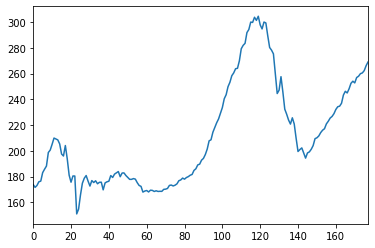

In [11]:
df['CPIAdjPrice'].plot()

The cyclically adjusted price-to-earnings ratio, commonly known as CAPE,Shiller P/E, or P/E 10
ratio, is a valuation measure usually applied to the US S&P 500 equity market. It is defined as price
divided by the average of ten years of earnings (moving average), adjusted for inflation. 

It was introduced first by Yale University professor Robert Shiller who wrote the book on irrational
exuberance and by professor John Campbell.

It is a variation of the normal P/E ratio because it takes into consideration the real (inflation
adjusted) past earnings and smooth out the impact of business cycles and other events and gives a
better picture of an index's sustainable earning power.
The ratio has been under attention recently because it is higher for the USA market slightly higher
than on the eve of the Great Crash of 1929. Since the dot-com bubble burst, valuations have only
once been higher than they are now, and that was in January 2018, immediately before a more than
18% correction.

In [26]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

df = pd.read_excel('ie_data.xlsx')#'https://drive.google.com/file/d/1n6VCAmsLIYGbQlZ7xkE7SUjLOCYecdKc/view?usp=sharing', sheetname='Data')
df.describe()
df.tail()

,Date,S&P,Dividend,Earnings,CPI,Date Fraction,Rate GS10,Real Price,Real Dividend,Real Total Return Price,...,CAPE,Unnamed: 13,TR CAPE,Unnamed: 15,Yield,Returns,Returns.1,Real Return,Real Return.1,Returns.2
1796,2020.09,3365.516667,58.850000,98.22,260.28000,2020.708333,0.68,3363.315271,58.811506,2115138.177,...,30.833593,NaN,33.812021,NaN,0.043312,0.990078,58.607018,NaN,NaN,NaN
1797,2020.10,3418.701364,58.659615,NaN,260.38800,2020.791667,0.79,3415.048147,58.596932,2150743.095,...,31.277783,NaN,34.300840,NaN,0.041667,0.99306,58.001452,NaN,NaN,NaN
1798,2020.11,3548.992500,58.469231,NaN,260.22900,2020.875000,0.87,3547.366173,58.442437,2237142.063,...,32.435871,NaN,35.595668,NaN,0.039620,0.995043,57.634128,NaN,NaN,NaN
1799,2020.12,3695.310000,58.278846,NaN,260.14950,2020.958333,0.93,3694.745369,58.269941,2333148.891,...,33.732253,NaN,37.041408,NaN,0.037630,1.00077,57.365974,NaN,NaN,NaN
1800,2021.10,3700.650000,NaN,NaN,260.10975,2021.041667,0.93,3700.650000,NaN,2336877.534,...,33.739464,NaN,37.023193,NaN,0.037125,#REF!,57.419206,NaN,NaN,NaN


In [29]:
df['CPI_Multiplier'] = df['CPI'].iloc[-1] / df['CPI']

df['real_SPX'] = df['S&P']*df['CPI_Multiplier']
df['real_div'] = df['Dividend']*df['CPI_Multiplier']
df['real_earnings'] = df['Earnings']*df['CPI_Multiplier']
df['average earnings']=df['real_earnings'].rolling(120).mean()
df['CAPE']=df['real_SPX']/df['average earnings']

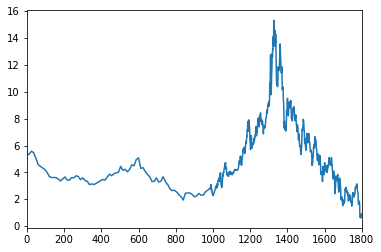

In [32]:

df['Rate GS10'].plot()